In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark as ps
from pyspark.sql import SparkSession

In [153]:
spark=SparkSession.builder.appName('loan').getOrCreate()
spark

#Loading Dataset

In [154]:
df=spark.read.csv('loan_data.csv',header=True,inferSchema=True)
df.show()

+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+
|person_age|person_gender|person_education|person_income|person_emp_exp|person_home_ownership|loan_amnt|      loan_intent|loan_int_rate|loan_percent_income|cb_person_cred_hist_length|credit_score|previous_loan_defaults_on_file|loan_status|
+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+
|      22.0|       female|          Master|      71948.0|             0|                 RENT|  35000.0|         PERSONAL|        16.02|               0.49|                       3.0|         561|                            No|          1|
|      21.0|       female|     High Scho

In [155]:
df.describe().show()

+-------+-----------------+-------------+----------------+-----------------+-----------------+---------------------+-----------------+-----------------+------------------+-------------------+--------------------------+-----------------+------------------------------+------------------+
|summary|       person_age|person_gender|person_education|    person_income|   person_emp_exp|person_home_ownership|        loan_amnt|      loan_intent|     loan_int_rate|loan_percent_income|cb_person_cred_hist_length|     credit_score|previous_loan_defaults_on_file|       loan_status|
+-------+-----------------+-------------+----------------+-----------------+-----------------+---------------------+-----------------+-----------------+------------------+-------------------+--------------------------+-----------------+------------------------------+------------------+
|  count|            45000|        45000|           45000|            45000|            45000|                45000|            45000|     

In [156]:
df.printSchema()

root
 |-- person_age: double (nullable = true)
 |-- person_gender: string (nullable = true)
 |-- person_education: string (nullable = true)
 |-- person_income: double (nullable = true)
 |-- person_emp_exp: integer (nullable = true)
 |-- person_home_ownership: string (nullable = true)
 |-- loan_amnt: double (nullable = true)
 |-- loan_intent: string (nullable = true)
 |-- loan_int_rate: double (nullable = true)
 |-- loan_percent_income: double (nullable = true)
 |-- cb_person_cred_hist_length: double (nullable = true)
 |-- credit_score: integer (nullable = true)
 |-- previous_loan_defaults_on_file: string (nullable = true)
 |-- loan_status: integer (nullable = true)



In [157]:
print(df.columns)
print()
df.dtypes

['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']



[('person_age', 'double'),
 ('person_gender', 'string'),
 ('person_education', 'string'),
 ('person_income', 'double'),
 ('person_emp_exp', 'int'),
 ('person_home_ownership', 'string'),
 ('loan_amnt', 'double'),
 ('loan_intent', 'string'),
 ('loan_int_rate', 'double'),
 ('loan_percent_income', 'double'),
 ('cb_person_cred_hist_length', 'double'),
 ('credit_score', 'int'),
 ('previous_loan_defaults_on_file', 'string'),
 ('loan_status', 'int')]

#Analysis and Visualisations

In [158]:
df1=pd.read_csv('loan_data.csv')

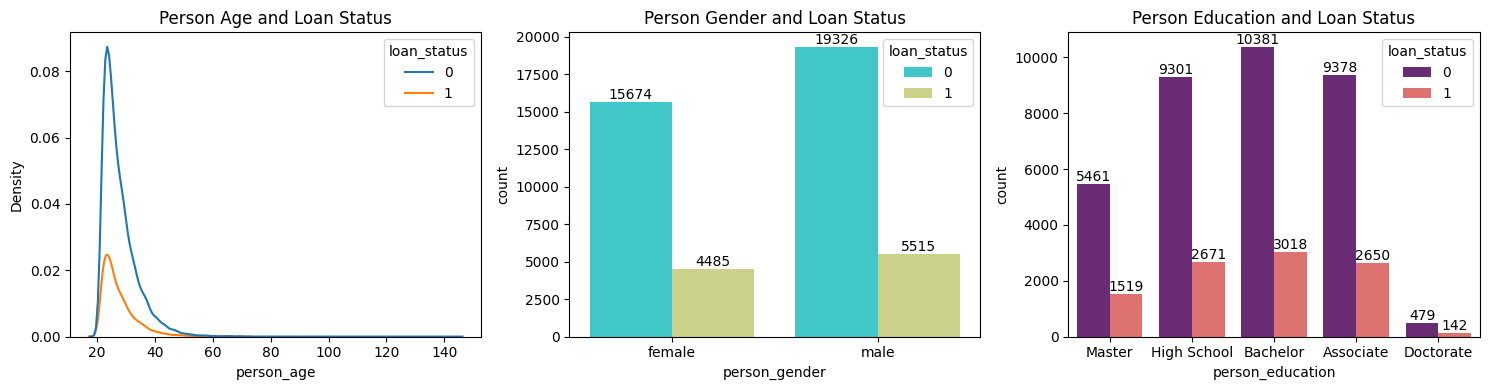

In [159]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
res=sns.kdeplot(data=df1,x='person_age',hue='loan_status')
plt.title('Person Age and Loan Status')

plt.subplot(1,3,2)
obj=sns.countplot(data=df1,x='person_gender',hue='loan_status',palette='rainbow')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Person Gender and Loan Status')

plt.subplot(1,3,3)
obj=sns.countplot(data=df1,x='person_education',hue='loan_status',palette='magma')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Person Education and Loan Status')

plt.tight_layout()

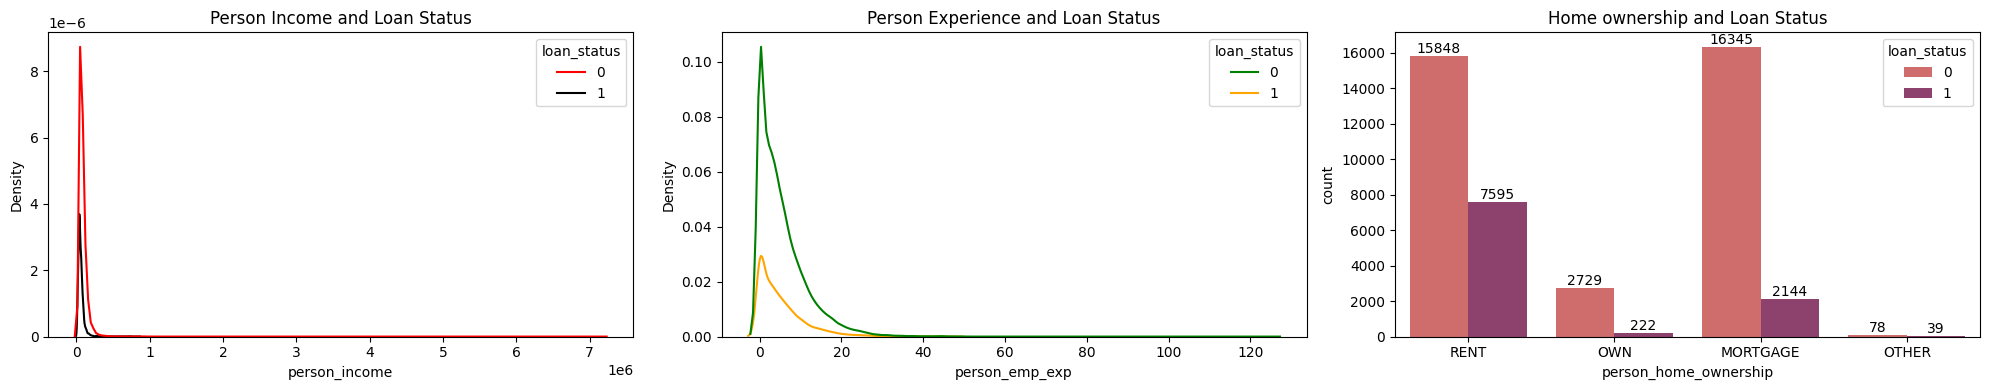

In [160]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
res=sns.kdeplot(data=df1,x='person_income',hue='loan_status',palette=['red','black'])
plt.title('Person Income and Loan Status')

plt.subplot(1,3,2)
obj=sns.kdeplot(data=df1,x='person_emp_exp',hue='loan_status',palette=['green','orange'])
plt.title('Person Experience and Loan Status')

plt.subplot(1,3,3)
obj=sns.countplot(data=df1,x='person_home_ownership',hue='loan_status',palette='flare')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Home ownership and Loan Status')


plt.tight_layout()

<ipython-input-161-c30e3b0265b5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj=sns.barplot(data=df1,y='loan_amnt',x='loan_status',palette='rocket')


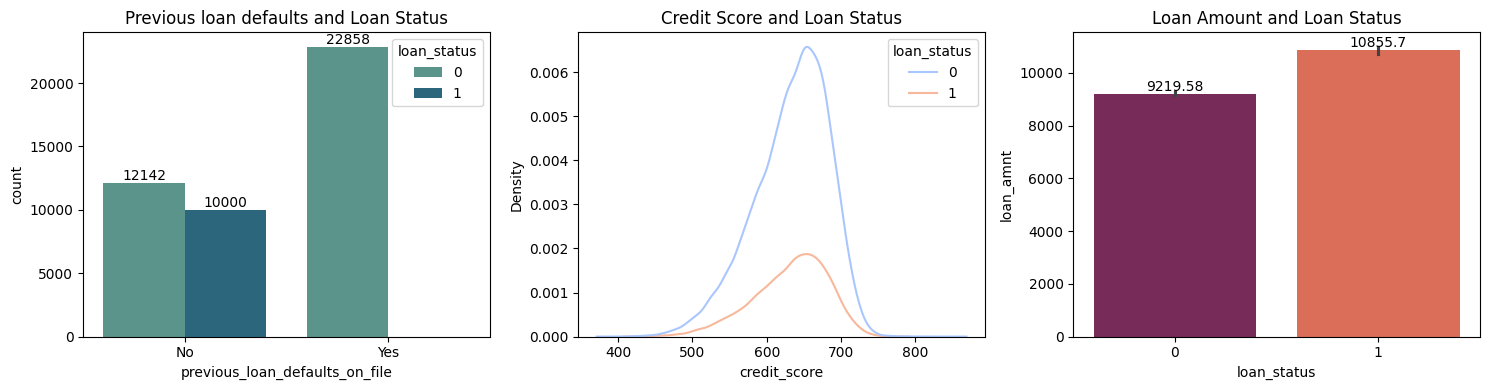

In [161]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,3)
obj=sns.barplot(data=df1,y='loan_amnt',x='loan_status',palette='rocket')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Loan Amount and Loan Status')

plt.subplot(1,3,2)
res=sns.kdeplot(data=df1,x='credit_score',hue='loan_status',palette='coolwarm')
plt.title('Credit Score and Loan Status')

plt.subplot(1,3,1)
obj=sns.countplot(data=df1,x='previous_loan_defaults_on_file',hue='loan_status',palette='crest')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous loan defaults and Loan Status')


plt.tight_layout()

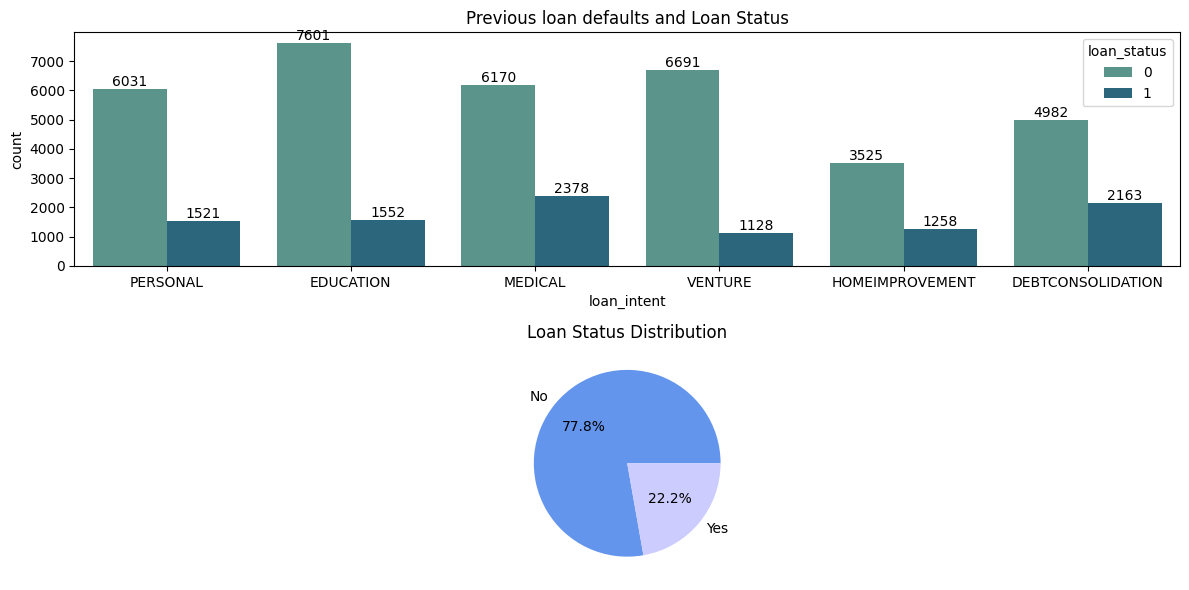

In [162]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
obj=sns.countplot(data=df1,x='loan_intent',hue='loan_status',palette='crest')
for i in obj.containers:
  obj.bar_label(i)
plt.title('Previous loan defaults and Loan Status')

plt.subplot(2,1,2)
loan_status_counts = df1['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=['No','Yes'], autopct='%1.1f%%',colors=['#6495ED','#CCCCFF'])
plt.title('Loan Status Distribution')

plt.tight_layout()

#Logistic Regression

##PreProcessing

In [163]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer



In [164]:
# si=StringIndexer(inputCols=['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file'],outputCols=['new_person_gender','new_person_education','new_person_home_ownership','new_loan_intent','new_previous_loan_defaults_on_file'])
# d2res=si.fit(df).transform(df)
# d2res.show()

In [169]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
               'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'],
    outputCol="features"
)

df = assembler.transform(df)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
d2res = scaler.fit(df).transform(df)

d2res.show()

+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+--------------------+--------------------+
|person_age|person_gender|person_education|person_income|person_emp_exp|person_home_ownership|loan_amnt|      loan_intent|loan_int_rate|loan_percent_income|cb_person_cred_hist_length|credit_score|previous_loan_defaults_on_file|loan_status|            features|     scaled_features|
+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+--------------------+--------------------+
|      22.0|       female|          Master|      71948.0|             0|                 RENT|  35000.0|         PERSONAL|        16.02|               0.4

In [171]:
si=StringIndexer(inputCols=['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file'],outputCols=['new_person_gender','new_person_education','new_person_home_ownership','new_loan_intent','new_previous_loan_defaults_on_file'])
d2res1=si.fit(d2res).transform(d2res)

d2res1.show()

+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+--------------------+-----------------+--------------------+-------------------------+---------------+----------------------------------+
|person_age|person_gender|person_education|person_income|person_emp_exp|person_home_ownership|loan_amnt|      loan_intent|loan_int_rate|loan_percent_income|cb_person_cred_hist_length|credit_score|previous_loan_defaults_on_file|loan_status|            features|new_person_gender|new_person_education|new_person_home_ownership|new_loan_intent|new_previous_loan_defaults_on_file|
+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+-------

In [173]:
assembler = VectorAssembler(
    inputCols=['new_person_gender','new_person_education','new_person_home_ownership','new_loan_intent','new_previous_loan_defaults_on_file','features'],
    outputCol="result_features"
)

dfinal = assembler.transform(d2res1)


In [174]:
dfinal.show()

+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+------------------------------+-----------+--------------------+-----------------+--------------------+-------------------------+---------------+----------------------------------+--------------------+
|person_age|person_gender|person_education|person_income|person_emp_exp|person_home_ownership|loan_amnt|      loan_intent|loan_int_rate|loan_percent_income|cb_person_cred_hist_length|credit_score|previous_loan_defaults_on_file|loan_status|            features|new_person_gender|new_person_education|new_person_home_ownership|new_loan_intent|new_previous_loan_defaults_on_file|     result_features|
+----------+-------------+----------------+-------------+--------------+---------------------+---------+-----------------+-------------+-------------------+--------------------------+------------+--------

In [175]:
fin=dfinal.select(['result_features','loan_status'])
fin.show()

+--------------------+-----------+
|     result_features|loan_status|
+--------------------+-----------+
|[1.0,3.0,0.0,3.0,...|          1|
|[1.0,2.0,2.0,0.0,...|          0|
|[1.0,2.0,1.0,1.0,...|          1|
|[1.0,0.0,0.0,1.0,...|          1|
|[0.0,3.0,0.0,1.0,...|          1|
|[1.0,2.0,2.0,2.0,...|          1|
|[1.0,0.0,0.0,0.0,...|          1|
|[1.0,2.0,0.0,1.0,...|          1|
|[1.0,1.0,0.0,3.0,...|          1|
|[1.0,2.0,2.0,2.0,...|          1|
|[1.0,2.0,0.0,2.0,...|          1|
|[1.0,1.0,2.0,5.0,...|          1|
|[0.0,0.0,0.0,2.0,...|          1|
|[0.0,3.0,0.0,0.0,...|          1|
|[1.0,1.0,0.0,0.0,...|          0|
|[1.0,3.0,1.0,4.0,...|          0|
|[0.0,0.0,0.0,0.0,...|          0|
|[1.0,2.0,0.0,1.0,...|          1|
|[0.0,0.0,0.0,4.0,...|          1|
|[1.0,3.0,1.0,0.0,...|          1|
+--------------------+-----------+
only showing top 20 rows



##Train_Test_Split

In [179]:
X,Y=fin.randomSplit([0.75,0.25])
model=LogisticRegression(featuresCol='result_features',labelCol='loan_status')
model

LogisticRegression_766bc79db24b

In [180]:
model=model.fit(X)

In [181]:
model.coefficients

DenseVector([-0.0152, -0.0016, -0.8318, 0.1488, 23.2734, 0.0049, 0.0, -0.0001, 0.334, 15.9903, -0.0077, -0.0089])

In [182]:
model.intercept

-23.37251895643221

##Prediction and Model_Evaluation

In [183]:
pred=model.evaluate(Y)
pred.predictions.show()

+--------------------+-----------+--------------------+--------------------+----------+
|     result_features|loan_status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|[0.0,0.0,0.0,0.0,...|          0|[24.4846541767584...|[0.99999999997674...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[23.1272598838023...|[0.99999999990964...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[23.3863766026153...|[0.99999999993026...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[24.5000689791164...|[0.99999999997710...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[24.9728664813518...|[0.99999999998573...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[23.7388567545507...|[0.99999999995098...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[23.1983023971204...|[0.99999999991584...|       0.0|
|[0.0,0.0,0.0,0.0,...|          0|[23.4199678600974...|[0.99999999993257...|       0.0|
|[0.0,0.0,0.0,0.0,...|          

In [185]:
pred.accuracy

0.8925708177445216

In [186]:
pred.weightedPrecision

0.8914114547580075

In [187]:
pred.weightedRecall

0.8925708177445216